<a href="https://colab.research.google.com/github/vibhork567/Crowd-size-estimation-/blob/main/people_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install image

     |████████████████████████████████| 7.9MB 12.9MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=5a3e003b94ac70d458c026f2718b9bf510853a4a244b9f56d663cce9b2d43695
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built image


In [ ]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [ ]:
from scipy import spatial

In [ ]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [ ]:
#root = '/content/drive/MyDrive/project final year/Shanghai'
root = '/content/drive/MyDrive/ShanghaiTech'

In [ ]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
path_sets

['/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images',
 '/content/drive/MyDrive/ShanghaiTech/part_A/test_data/images']

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
#print(img_paths)

['/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_127.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_124.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_125.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_123.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_119.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_122.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_117.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_118.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_12.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_120.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_121.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_116.jpg', '/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_115.jpg', '/content/dr

In [ ]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_127.jpg
(300, 400)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_124.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_125.jpg
(565, 849)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_123.jpg
(774, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_119.jpg
(594, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_122.jpg
(787, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_117.jpg
(579, 840)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_118.jpg
(651, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_A/train_data/images/IMG_12.jpg
(680, 1024)
generate density...
done.
/cont

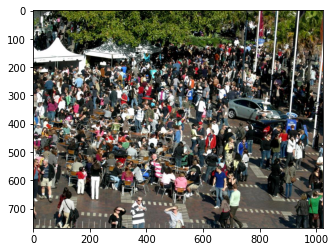

In [ ]:
plt.imshow(Image.open('/content/drive/MyDrive/ShanghaiTech/part_A/test_data/images/IMG_10.jpg'))

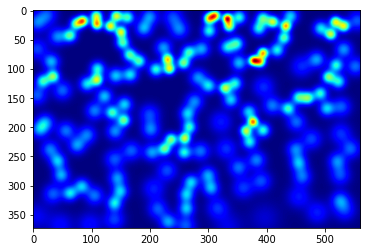

In [ ]:
gt_file = h5py.File(img_paths[10].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)

151.185

In [ ]:
path_sets = [part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_108.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_105.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_104.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_107.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_106.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_103.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_102.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_101.jpg
(768, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/IMG_100.jpg
(768, 1024)
generate density...
done.
/

In [ ]:
!cd CSRNet-pytorch
!python train.py part_A_train.json part_A_val.json 0 0

/bin/bash: line 0: cd: CSRNet-pytorch: No such file or directory
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:02<00:00, 225MB/s]
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
epoch 0, processed 0 samples, lr 0.0000001000
Traceback (most recent call last):
  File "train.py", line 230, in <module>
    main()        
  File "train.py", line 92, in main
    train(train_list, model, criterion, optimizer, epoch)
  File "train.py", line 131, in train
    for i,(img, target)in enumerate(train_loader):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 557, in _next_data
    data =

In [ ]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [ ]:

from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [ ]:
#defining the location of dataset
root = '/content/drive/MyDrive/project final year/Shanghai'
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [ ]:
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)

In [ ]:
model = CSRNet()

In [ ]:
#defining the model
model = model.cuda()

In [ ]:
#loading the trained weights
checkpoint = torch.load('/content/0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

FileNotFoundError: ignored

In [ ]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

In [ ]:
!pip install image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image

In [ ]:
from matplotlib import cm as c
img = Image.open('/content/drive/MyDrive/project final year/Shanghai /part_A_final/test_data/images/IMG_10.jpg').convert('RGB')

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_A/test_data/images/IMG_100.jpg'))
plt.show()